# training model

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import pickle
from optimizer import Adam
from VGG_like import VGG_like
from keras.preprocessing.image import ImageDataGenerator

2024-12-26 22:09:05.498238: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-12-26 22:09:06.552360: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-12-26 22:09:09.853416: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2024-12-26 22:09:09.858150: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] 

## load MNIST dataset

In [2]:
import tensorflow as tf
mnist = tf.keras.datasets.mnist
(X_train, y_train),(X_test, y_test) = mnist.load_data()
from sklearn.preprocessing import LabelBinarizer
lb = LabelBinarizer()

# 正規化
train_data = (X_train - X_train.min()) / X_train.max()
test_data = (X_test - X_test.min()) / X_test.max()
train_label = lb.fit_transform(y_train)
test_label = lb.fit_transform(y_test)

In [3]:
# 画像リサイズ調整用
scale = 1  # 28*8 = 224
train_data = np.expand_dims(train_data, axis=1)
print(train_data.shape)  # (60000, 1, 28, 28)

# 高さ方向 (axis=2) を拡大
resized_h = np.repeat(train_data, scale, axis=2)
print(resized_h.shape)   # (60000, 1, 224, 28)

# 幅方向 (axis=3) を拡大
resized_hw = np.repeat(resized_h, scale, axis=3)
print(resized_hw.shape)  # (60000, 1, 224, 224)

train_data = resized_hw[:10000]
train_label = train_label[:10000]


# shapeを出力.
print("train_data.shape=", train_data.shape)
print("train_label.shape=", train_label.shape)

(60000, 1, 28, 28)
(60000, 1, 28, 28)
(60000, 1, 28, 28)
train_data.shape= (10000, 1, 28, 28)
train_label.shape= (10000, 10)


In [4]:
# 更に正規化
train_data = train_data.astype('float32')
test_data = test_data.astype('float32')

## put noise on images

In [5]:
# CutOut
def random_cutout(image, mask_size=5):
    """
    image: shape = (C, H, W) の 1 画像 (channels_first 前提)
    mask_size: カットアウトする正方形の一辺の長さ
    """
    _, h, w = image.shape
    
    # mask_size より小さい場合は何もしない
    if mask_size >= h or mask_size >= w:
        return image
    
    # マスク(切り取る領域)の左上座標をランダムに決定
    top = np.random.randint(0, h - mask_size)
    left = np.random.randint(0, w - mask_size)
    
    # 指定領域を 0 (黒) で塗りつぶす
    image[:, top:top+mask_size, left:left+mask_size] = 0
    return image

## train

epoch=0
it= 0


/tmp/ipykernel_670484/3394385648.py:44: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  iter_num = np.ceil(xsize / batch_size).astype(np.int)


it= 1
it= 2
it= 3
it= 4
it= 5
it= 6
it= 7
it= 8
it= 9
it= 10
it= 11
it= 12
it= 13
it= 14
it= 15
it= 16
it= 17
it= 18
it= 19
it= 20
it= 21
it= 22
it= 23
it= 24
it= 25
it= 26
it= 27
train_loss: 0.5732224830451248
test_loss: 0.5265523292738867
train_accuracy: 0.8261428571428572
test_accuracy: 0.8313333333333334
epoch=1
it= 0
it= 1
it= 2
it= 3
it= 4
it= 5
it= 6
it= 7
it= 8
it= 9
it= 10
it= 11
it= 12
it= 13
it= 14
it= 15
it= 16
it= 17
it= 18
it= 19
it= 20
it= 21
it= 22
it= 23
it= 24
it= 25
it= 26
it= 27
test_loss: 2.4564087796061105
train_accuracy: 0.5102857142857142
test_accuracy: 0.5126666666666667
epoch=2
it= 0
it= 1
it= 2
it= 3
it= 4
it= 5
it= 6
it= 7
it= 8
it= 9
it= 10
it= 11
it= 12
it= 13
it= 14
it= 15
it= 16
it= 17
it= 18
it= 19
it= 20
it= 21
it= 22
it= 23
it= 24
it= 25
it= 26
it= 27
train_loss: 0.362343610231318
test_loss: 0.3513285662436347
train_accuracy: 0.8935714285714286
test_accuracy: 0.8953333333333333
epoch=3
it= 0
it= 1
it= 2
it= 3
it= 4
it= 5
it= 6
it= 7
it= 8
it= 9
it= 10

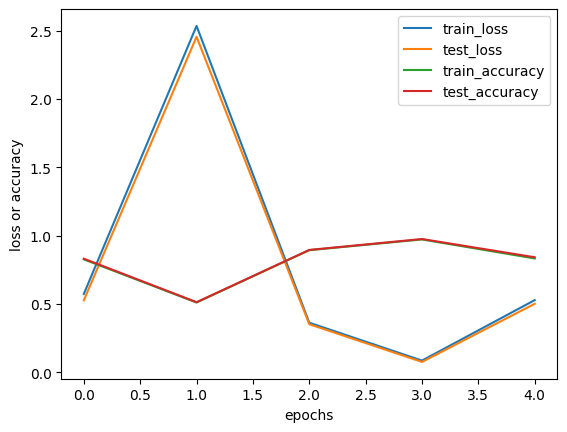

epoch=0
it= 0
it= 1
it= 2
it= 3
it= 4
it= 5
it= 6
it= 7
it= 8
it= 9
it= 10
it= 11
it= 12
it= 13
it= 14
it= 15
it= 16
it= 17
it= 18
it= 19
it= 20
it= 21
it= 22
it= 23
it= 24
it= 25
it= 26
it= 27
train_loss: 0.15751192025195662
test_loss: 0.15705348053147494
train_accuracy: 0.9485714285714286
test_accuracy: 0.9516666666666667
epoch=1
it= 0
it= 1
it= 2
it= 3
it= 4
it= 5
it= 6
it= 7
it= 8
it= 9
it= 10
it= 11
it= 12
it= 13
it= 14
it= 15
it= 16
it= 17
it= 18
it= 19
it= 20
it= 21
it= 22
it= 23
it= 24
it= 25
it= 26
it= 27
train_loss: 0.0479911887666661
test_loss: 0.05954340168680426
train_accuracy: 0.9845714285714285
test_accuracy: 0.981
Test accuracy exceeded 98%. Stopping training.
model_epoch1_acc0.98_loop1.pkl
epoch=2
it= 0
it= 1
it= 2
it= 3
it= 4
it= 5
it= 6
it= 7
it= 8
it= 9
it= 10
it= 11
it= 12
it= 13
it= 14
it= 15
it= 16
it= 17
it= 18
it= 19
it= 20
it= 21
it= 22
it= 23
it= 24
it= 25
it= 26
it= 27
train_loss: 0.09973030126609896
test_loss: 0.10937751547097255
train_accuracy: 0.966857142

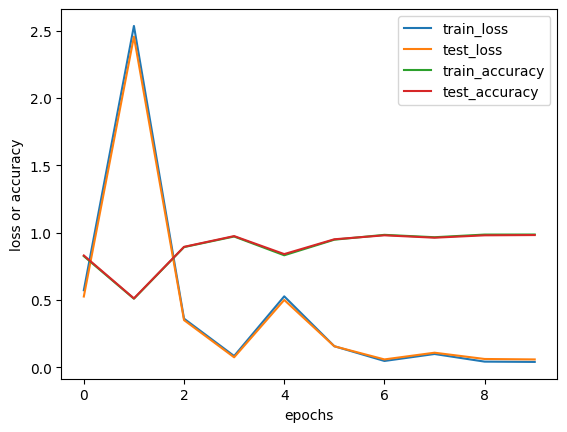

Test accuracy exceeded 98%. Stopping training.
model_epoch4_acc0.98_loop1.pkl
epoch=0
it= 0
it= 1
it= 2
it= 3
it= 4
it= 5
it= 6
it= 7
it= 8
it= 9
it= 10
it= 11
it= 12
it= 13
it= 14
it= 15
it= 16
it= 17
it= 18
it= 19
it= 20
it= 21
it= 22
it= 23
it= 24
it= 25
it= 26
it= 27
train_loss: 0.04455493361126314
test_loss: 0.04693581094233891
train_accuracy: 0.9858571428571429
test_accuracy: 0.9853333333333333
Test accuracy exceeded 98%. Stopping training.
model_epoch0_acc0.99_loop2.pkl
epoch=1
it= 0
it= 1
it= 2
it= 3
it= 4
it= 5
it= 6
it= 7
it= 8
it= 9
it= 10
it= 11
it= 12
it= 13
it= 14
it= 15
it= 16
it= 17
it= 18
it= 19
it= 20
it= 21
it= 22
it= 23
it= 24
it= 25
it= 26
it= 27
train_loss: 1.833092590533987
test_loss: 1.8551212064672402
train_accuracy: 0.5574285714285714
test_accuracy: 0.5556666666666666
epoch=2
it= 0
it= 1
it= 2
it= 3
it= 4
it= 5
it= 6
it= 7
it= 8
it= 9
it= 10
it= 11
it= 12
it= 13
it= 14
it= 15
it= 16
it= 17
it= 18
it= 19
it= 20
it= 21
it= 22
it= 23
it= 24
it= 25
it= 26
it= 27
t

KeyboardInterrupt: 

In [6]:
# ハイパーパラメータの設定
epochs = 5
batch_size = 256
lr = 0.08
loop = 5

p = 0.5  # ★ 変更箇所：Cutout を適用する確率
mask_size = 5  # ★ 変更箇所：Cutout の領域(一辺)

optimizer = Adam()

# CNNのオブジェクト生成 (例: VGG_likeを使用)
snet = VGG_like(input_dim=(1, 28, 28),
                conv_param={'filter_size':3, 'pad':1, 'stride':1},
                pool_param={'pool_size':2, 'pad':0, 'stride':2},
                output_size=10, weight_init_std=0.01)

train_loss = []
test_loss = []
train_accuracy = []
test_accuracy = []

# データ拡張用のImageDataGenerator設定
# rotation_rangeやshift, zoomなどは参考コードと同様あるいは適宜調整可能
datagen = ImageDataGenerator(
    rotation_range=20,
    height_shift_range=0.2,
    width_shift_range=0.2,
    zoom_range=0.15,
    data_format='channels_first'
)

for i in range(loop):
    # データ分割
    train, test, train_labels, test_labels = train_test_split(train_data, train_label, test_size=0.3, shuffle=True)
    
    # データ拡張のためにfit

    datagen.fit(train)
    
    x = train
    t = train_labels
    xsize = x.shape[0]
    iter_num = np.ceil(xsize / batch_size).astype(np.int)

    for epoch in range(epochs):
        print("epoch=%s" % epoch)
        
        # 学習用データをシャッフル
        idx = np.arange(xsize)
        np.random.shuffle(idx)
        x = x[idx]
        t = t[idx]

        # datagen.flowを用いてミニバッチ取得
        flow = datagen.flow(x, t, batch_size=batch_size, shuffle=False)

        for it in range(iter_num):
            print("it=", it)
            # next()を呼ぶと拡張後のミニバッチが得られる
            x_train_batch, t_train_batch = flow.next()
            
                     # ★ 変更箇所: Cutout を確率 p で適用
            for j in range(x_train_batch.shape[0]):
                if np.random.rand() < p:
                    x_train_batch[j] = random_cutout(x_train_batch[j], mask_size=mask_size)

            # 勾配の計算 (誤差逆伝播法を用いる)
            grads = snet.gradient(x_train_batch, t_train_batch)

            # パラメータ更新
            optimizer.update(snet.params, grads)

        # 学習経過の記録
        # 訓練データにおけるloss
        loss_train = snet.loss(x,  t)
        train_loss.append(loss_train)
        print("train_loss:", train_loss[-1])

        # テストデータにおけるloss
        loss_test = snet.loss(test, test_labels)
        test_loss.append(loss_test)
        print("test_loss:", test_loss[-1])

        # 訓練データにおける精度
        acc_train = snet.accuracy(x, t)
        train_accuracy.append(acc_train)
        print("train_accuracy:", train_accuracy[-1])

        # テストデータにおける精度
        acc_test = snet.accuracy(test, test_labels)
        test_accuracy.append(acc_test)
        print("test_accuracy:", test_accuracy[-1])
        
        # ループを終えるごとに学習曲線を描画
        if epoch == epochs-1:
            df_log = pd.DataFrame({"train_loss":train_loss,
                 "test_loss":test_loss,
                 "train_accuracy":train_accuracy,
                 "test_accuracy":test_accuracy})
            df_log.plot()
            plt.ylabel("loss or accuracy")
            plt.xlabel("epochs")
            plt.show()
        
        # 早期終了条件: テスト精度が98%を超えたら終了
        if test_accuracy[-1] > 0.98:
            print("Test accuracy exceeded 98%. Stopping training.")
            
            # モデルの保存
    
            fname = f"model_epoch{epoch}_acc{test_accuracy[-1]:.2f}_loop{i}.pkl"
            save_dict = {
                        'params': snet.params,
                        'bn_stats': {}
                    }
            for block_idx in range(1, 5):
                save_dict['bn_stats'][f'BatchNorm_block{block_idx}'] = {
                    'moving_mean': snet.layers[f'BatchNorm_block{block_idx}'].moving_mean,
                    'moving_var': snet.layers[f'BatchNorm_block{block_idx}'].moving_var
                }
            with open(fname, "wb") as f:
                pickle.dump(save_dict, f)
            print(fname)
            
            # ループを抜ける

In [ ]:
# lossのグラフ化
df_log = pd.DataFrame({"train_loss":train_loss,
             "test_loss":test_loss,
             "train_accuracy":train_accuracy,
             "test_accuracy":test_accuracy})
df_log.plot()
plt.ylabel("loss or accuracy")
plt.xlabel("epochs")
plt.show()

print(test_accuracy[-1])

## Out put the graph of loss and accuracy

In [ ]:
df_log = pd.DataFrame({
             "train_accuracy":train_accuracy,
             "test_accuracy":test_accuracy})
df_log.plot()
plt.ylabel("loss or accuracy")
plt.xlabel("epochs")
plt.show()